In [1]:
%load_ext autoreload 
%autoreload 
from BTCPred.data import get_data_csv, clean_data, sequencing
from BTCPred.encoders import scaler,split
from BTCPred.trainer import Model

2021-11-29 17:01:10.545680: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-29 17:01:10.545805: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import sys
sys.path.append('/home/useradd/code/alexanderknave/bitcoin-market-prediction')
print(sys.path)

['/home/useradd/code/alexanderknave/bitcoin-market-prediction/notebooks', '/home/useradd/code/LucaVanTichelen/data-challenges/04-Decision-Science', '/home/useradd/code/alexanderknave/bitcoin-market-prediction/notebooks', '/home/useradd/.pyenv/versions/3.8.12/lib/python38.zip', '/home/useradd/.pyenv/versions/3.8.12/lib/python3.8', '/home/useradd/.pyenv/versions/3.8.12/lib/python3.8/lib-dynload', '', '/home/useradd/.pyenv/versions/3.8.12/envs/bitcoin-market-prediction/lib/python3.8/site-packages', '/home/useradd/.pyenv/versions/3.8.12/envs/bitcoin-market-prediction/lib/python3.8/site-packages/IPython/extensions', '/home/useradd/.ipython', '/home/useradd/code/alexanderknave/bitcoin-market-prediction']


In [4]:
data_df = get_data_csv()

data retrieved


In [5]:
data_df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1.637453e+12,2021-11-21 00:00:00,BTC/USD,59744.0,59800.0,59595.0,59605.0,117.237747,6.987956e+06
1,1.637449e+12,2021-11-20 23:00:00,BTC/USD,59725.0,59887.0,59545.0,59744.0,301.120544,1.799015e+07
2,1.637446e+12,2021-11-20 22:00:00,BTC/USD,59641.0,59750.0,59555.0,59723.0,142.799885,8.528438e+06
3,1.637442e+12,2021-11-20 21:00:00,BTC/USD,59452.0,59691.0,59396.0,59636.0,221.857940,1.323072e+07
4,1.637438e+12,2021-11-20 20:00:00,BTC/USD,59480.0,59567.0,59352.0,59452.0,206.936323,1.230278e+07
...,...,...,...,...,...,...,...,...,...
13693,1.588158e+12,2020-04-29 11:00:00,BTC/USD,8130.0,8196.5,8124.0,8142.0,124.709427,1.015384e+06
13694,1.588154e+12,2020-04-29 10:00:00,BTC/USD,7993.0,8179.0,7983.5,8130.0,169.378107,1.377044e+06
13695,1.588151e+12,2020-04-29 09:00:00,BTC/USD,7957.0,8032.5,7952.0,7993.0,130.252126,1.041105e+06
13696,1.588147e+12,2020-04-29 08:00:00,BTC/USD,7961.0,7977.5,7942.5,7957.0,12.558909,9.993124e+04


In [90]:
data_cleaned = clean_data(data_df)
data_cleaned.head(25)

data cleaned


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
13697,1.588144e+12,2020-04-29 07:00:00,BTC/USD,7959.5,7977.5,7928.0,7961.0,73.040033,5.814717e+05
13696,1.588147e+12,2020-04-29 08:00:00,BTC/USD,7961.0,7977.5,7942.5,7957.0,12.558909,9.993124e+04
13695,1.588151e+12,2020-04-29 09:00:00,BTC/USD,7957.0,8032.5,7952.0,7993.0,130.252126,1.041105e+06
13694,1.588154e+12,2020-04-29 10:00:00,BTC/USD,7993.0,8179.0,7983.5,8130.0,169.378107,1.377044e+06
13693,1.588158e+12,2020-04-29 11:00:00,BTC/USD,8130.0,8196.5,8124.0,8142.0,124.709427,1.015384e+06
13692,1.588162e+12,2020-04-29 12:00:00,BTC/USD,8142.0,8275.0,8142.0,8264.0,79.697201,6.586177e+05
13691,1.588165e+12,2020-04-29 13:00:00,BTC/USD,8264.0,8409.0,8261.0,8314.5,213.086753,1.771710e+06
13690,1.588169e+12,2020-04-29 14:00:00,BTC/USD,8314.5,8372.5,8282.5,8368.5,65.134217,5.450757e+05
13689,1.588172e+12,2020-04-29 15:00:00,BTC/USD,8368.5,8389.5,8307.5,8382.0,22.193347,1.860246e+05
13688,1.588176e+12,2020-04-29 16:00:00,BTC/USD,8382.0,8789.0,8351.0,8605.0,287.687029,2.475547e+06


In [7]:
X,y = sequencing(data_cleaned)

data sequenced


In [8]:
X, y

(array([[ 7961. ,  7957. ,  7993. , ...,  8368.5,  8382. ,  8605. ],
        [ 7957. ,  7993. ,  8130. , ...,  8382. ,  8605. ,  8734.5],
        [ 7993. ,  8130. ,  8142. , ...,  8605. ,  8734.5,  8635.5],
        ...,
        [58670. , 58598. , 58512. , ..., 59462. , 59480. , 59452. ],
        [58598. , 58512. , 58390. , ..., 59480. , 59452. , 59636. ],
        [58512. , 58390. , 57658. , ..., 59452. , 59636. , 59723. ]]),
 array([ 8734.5,  8635.5,  8732.5, ..., 59636. , 59723. , 59744. ]))

In [9]:
X_scaled, y_scaled, scaler_x, scaler_y = scaler(X,y)

In [10]:
X_scaled, y_scaled 

(array([[[6.59174055e-05, 0.00000000e+00, 0.00000000e+00, ...,
          1.57374659e-03, 1.79738427e-03, 5.49154732e-03]],
 
        [[0.00000000e+00, 5.93256649e-04, 2.25901131e-03, ...,
          1.79738427e-03, 5.49154732e-03, 7.63681242e-03]],
 
        [[5.93256649e-04, 2.85092779e-03, 2.45688092e-03, ...,
          5.49154732e-03, 7.63681242e-03, 5.99680281e-03]],
 
        ...,
 
        [[8.35717346e-01, 8.34530833e-01, 8.33014543e-01, ...,
          8.47976079e-01, 8.48274263e-01, 8.47810422e-01]],
 
        [[8.34530833e-01, 8.33113609e-01, 8.31002869e-01, ...,
          8.48274263e-01, 8.47810422e-01, 8.50858520e-01]],
 
        [[8.33113609e-01, 8.31103128e-01, 8.18932823e-01, ...,
          8.47810422e-01, 8.50858520e-01, 8.52299741e-01]]]),
 array([[0.00763681],
        [0.0059968 ],
        [0.00760368],
        ...,
        [0.85085852],
        [0.85229974],
        [0.85264762]]))

In [11]:
X_train, X_test, y_train, y_test = split(X_scaled, y_scaled)

In [12]:
X_train 

array([[[0.80839458, 0.80616987, 0.8094021 , ..., 0.80503765,
         0.8065617 , 0.81219405]],

       [[0.9853169 , 0.97811542, 0.97239719, ..., 0.96703415,
         0.96211412, 0.96496343]],

       [[0.89810817, 0.90212913, 0.89720674, ..., 0.88900945,
         0.88165426, 0.88859531]],

       ...,

       [[0.02399394, 0.02400218, 0.02352175, ..., 0.01928254,
         0.01988719, 0.01971325]],

       [[0.84972479, 0.83398701, 0.84348514, ..., 0.86495598,
         0.86078141, 0.85490056]],

       [[0.46447052, 0.46147128, 0.47681628, ..., 0.47582642,
         0.47831129, 0.47529632]]])

In [13]:
test = Model(X_train, y_train, scaler_y, scaler_x, X_scaled)

In [14]:
model = test.lstm_model()

2021-11-29 17:01:15.363521: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-29 17:01:15.363668: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-29 17:01:15.363751: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-JM9NF235): /proc/driver/nvidia/version does not exist
2021-11-29 17:01:15.371117: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 128)         71168     
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 256)         394240    
                                                                 
 dropout_1 (Dropout)         (None, None, 256)         0         
                                                                 
 dense (Dense)               (None, None, 1)           257       
                                                                 
Total params: 465,665
Trainable params: 465,665
Non-trainable params: 0
_________________________________________________________________


In [15]:
es = test.early_stop()

In [16]:
test.fit()

Epoch 1/100
308/308 [==============================] - 8s 15ms/step - loss: 0.0870 - mse: 0.0870 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2/100
308/308 [==============================] - 4s 14ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 3.7868e-04 - val_mse: 3.7868e-04
Epoch 3/100
308/308 [==============================] - 5s 15ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 2.1403e-04 - val_mse: 2.1403e-04
Epoch 4/100
308/308 [==============================] - 6s 19ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 1.7471e-04 - val_mse: 1.7471e-04
Epoch 5/100
308/308 [==============================] - 6s 21ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 1.5928e-04 - val_mse: 1.5928e-04
Epoch 6/100
308/308 [==============================] - 6s 19ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 1.3263e-04 - val_mse: 1.3263e-04
Epoch 7/100
308/308 [==============================] - 4s 14ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 1.0425e-04 - val_mse: 1.0425e-04
Epoch 8/100
30

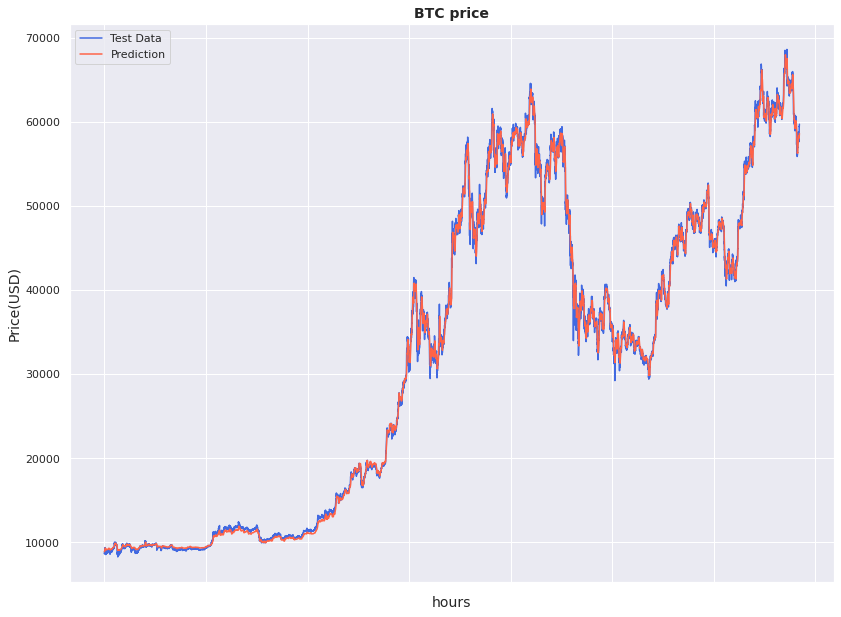

In [17]:
test.graphing(y)

In [64]:
X_scaled.shape

(13687, 1, 10)

In [133]:
X[1]

array([7957. , 7993. , 8130. , 8142. , 8264. , 8314.5, 8368.5, 8382. ,
       8605. , 8734.5])

In [134]:
test.scaler_y.inverse_transform(X_scaled[1][0][9].reshape((1,1)))

array([[8734.5]])

In [135]:
prediction = test.model.predict(X_scaled[1].reshape((1,1,10)))

In [136]:
prediction = prediction.reshape((1,1))
prediction

array([[0.01078324]], dtype=float32)

In [137]:
test.scaler_y.inverse_transform(prediction)

array([[8924.436]], dtype=float32)